**BACKGROUND:**

Warriors fans would like to know how Stephen Curry's box score impacts the team's wins.

**SOLUTION:**

Grab data from NBA data website and build models (Random Forest, Logstic Regression) to predict team wins based on Curry's stats.

**RESULTS:**

1. The top 3 most important factors are Curry's 3PT% (3-Point Field Goal Percentage), MP (Minutes Played)
and FGA (Field Goal Attempts).
2. If Warriors lost the game, Curry's 3PT% is extremely low, less than 28%. 
3. Logstic Regression Model to predict win has an precision of 0.88 and AUC of 0.85.

**Metrics Definition:**

* **G:** Game Number 
* **MP:** Minutes Played
* **FG:** Field Goals
* **FGA:** Field Goal Attempts
* **FG%:** Field Goal Percentage
* **3P:** 3-Point Field Goals
* **3PA:** 3-Point Field Goal Attempts
* **3P%:** 3-Point Field Goal Percentage
* **FT:** Free Throws
* **FTA:** Free Throw Attempts
* **FT%:** Free Throw Percentage
* **ORB:** Offensive Rebounds
* **DRB:** Defensive Rebounds
* **TRB:**  Total Rebounds
* **AST:** Assists
* **STL:** Steals
* **BLK:**  Blocks
* **TOV:**  Turnovers
* **PF:** Personal Fouls
* **PTS:**  Points
* **PER:**  Plus/Minus
* **TM:** Points
* **OPP:** Opponent Points
* **HOME:** Home or Away
* **WIN:** Win or Lose
* **GD:** Game Date
* **GT:** Game Time
* **WP:** Win Points
* **WT:** West or East Opponent

source: https://www.basketball-reference.com/teams/GSW/2017_games.html

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
nba = pd.read_csv('warriors_data_2016.csv')

In [4]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   G       78 non-null     int64  
 1   FG      78 non-null     int64  
 2   FGA     78 non-null     int64  
 3   FG%     78 non-null     float64
 4   3P      78 non-null     int64  
 5   3PA     78 non-null     int64  
 6   3P%     78 non-null     float64
 7   FT      78 non-null     int64  
 8   FTA     78 non-null     int64  
 9   FT%     70 non-null     float64
 10  ORB     78 non-null     int64  
 11  DRB     78 non-null     int64  
 12  TRB     78 non-null     int64  
 13  AST     78 non-null     int64  
 14  STL     78 non-null     int64  
 15  BLK     78 non-null     int64  
 16  TOV     78 non-null     int64  
 17  PF      78 non-null     int64  
 18  PTS     78 non-null     int64  
 19  PER     78 non-null     int64  
 20  TM      78 non-null     int64  
 21  OPP     78 non-null     int64  
 22  HOME

In [5]:
nba.describe()

,G,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,...,PF,PTS,PER,TM,OPP,HOME,WIN,WP,MP,WT
count,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,70.000000,...,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000
mean,40.717949,8.538462,18.269231,0.467026,4.115385,10.038462,0.400051,4.076923,4.551282,0.897186,...,2.307692,25.269231,12.679487,116.166667,104.089744,0.500000,0.820513,12.076923,33.359829,0.628205
std,23.821794,2.794672,4.056974,0.108861,2.384913,2.590905,0.173625,2.464128,2.670899,0.146436,...,1.435249,7.738709,12.629067,12.326106,11.364316,0.503236,0.386244,14.656916,3.345148,0.486412
min,1.000000,3.000000,10.000000,0.214000,0.000000,4.000000,0.000000,0.000000,0.000000,0.500000,...,0.000000,8.000000,-24.000000,86.000000,74.000000,0.000000,0.000000,-29.000000,26.700000,0.000000
25%,20.250000,7.000000,16.000000,0.400000,2.000000,8.000000,0.300000,3.000000,3.000000,0.800000,...,1.000000,20.250000,5.000000,108.000000,96.500000,0.000000,1.000000,6.000000,30.070833,0.000000
50%,40.500000,8.000000,18.000000,0.462000,4.000000,10.000000,0.385000,4.000000,4.000000,1.000000,...,2.000000,25.000000,14.000000,116.000000,104.500000,0.500000,1.000000,12.000000,34.108333,1.000000
75%,60.750000,10.000000,21.000000,0.529000,5.000000,12.000000,0.500000,5.000000,6.000000,1.000000,...,3.000000,29.000000,22.000000,123.750000,110.750000,1.000000,1.000000,20.750000,35.591667,1.000000
max,82.000000,16.000000,27.000000,0.700000,13.000000,17.000000,0.765000,12.000000,13.000000,1.000000,...,6.000000,46.000000,42.000000,149.000000,132.000000,1.000000,1.000000,46.000000,42.216667,1.000000


In [6]:
nba.groupby('WIN').mean()

,G,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,...,TOV,PF,PTS,PER,TM,OPP,HOME,WP,MP,WT
WIN,,,,,,,,,,,,,,,,,,,,,
0,42.928571,8.142857,19.428571,0.414429,3.000000,10.214286,0.289143,4.357143,4.785714,0.923714,...,3.571429,2.857143,23.642857,-4.714286,102.857143,113.142857,0.357143,-10.285714,34.911905,0.642857
1,40.234375,8.625000,18.015625,0.478531,4.359375,10.000000,0.424313,4.015625,4.500000,0.890554,...,2.921875,2.187500,25.625000,16.484375,119.078125,102.109375,0.531250,16.968750,33.020313,0.625000


In [6]:
nba.groupby('WIN').size()

WIN
0    14
1    64
dtype: int64

In [10]:
nba.groupby('WIN')['3P%'].mean()

WIN
0    0.289143
1    0.424312
Name: 3P%, dtype: float64

In [36]:
nba[nba['3P%']>=0.40].groupby('WIN').size()

WIN
0     2
1    35
dtype: int64

In [37]:
35 / 37

0.9459459459459459

In [18]:
nba[nba['3P%']<=0.10]

,G,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,...,PER,TM,OPP,HOME,WIN,GD,GT,WP,MP,WT
5,6,5,17,0.294,0,10,0.000,3,3,1.0,...,-5,97,117,0,0,Fri,10:30p ET,-20,31.100000,1
12,13,7,21,0.333,1,11,0.091,5,5,1.0,...,1,124,121,0,1,Sat,8:30p ET,3,34.683333,0
21,22,7,16,0.438,0,8,0.000,5,5,1.0,...,18,115,98,0,1,Wed,10:30p ET,17,33.283333,1
52,55,4,18,0.222,1,11,0.091,2,2,1.0,...,-24,110,132,0,0,Mon,9:00p ET,-22,26.700000,1
56,59,7,23,0.304,0,11,0.000,5,5,1.0,...,8,119,108,0,1,Mon,7:00p ET,11,34.800000,0


In [7]:
sum(nba['WIN'])

64

In [8]:
nba.dtypes

G         int64
FG        int64
FGA       int64
FG%     float64
3P        int64
3PA       int64
3P%     float64
FT        int64
FTA       int64
FT%     float64
ORB       int64
DRB       int64
TRB       int64
AST       int64
STL       int64
BLK       int64
TOV       int64
PF        int64
PTS       int64
PER       int64
TM        int64
OPP       int64
HOME      int64
WIN       int64
GD       object
GT       object
WP        int64
MP      float64
WT        int64
dtype: object

In [9]:
from sklearn.ensemble import ExtraTreesClassifier

In [10]:
from sklearn.ensemble import RandomForestClassifier

In [11]:
## Game Day and Game Time
print(nba['GD'].unique())
print(nba['GT'].unique())

['Tue' 'Fri' 'Sun' 'Thu' 'Mon' 'Wed' 'Sat']
['10:30p ET' '9:30p ET' '6:00p ET' '10:00p ET' '9:00p ET' '8:00p ET'
 '8:30p ET' '7:00p ET' '7:30p ET' '2:30p ET' '12:00p ET' '3:30p ET']


In [12]:
GDS = pd.get_dummies(nba['GD'], drop_first=True)
GTS = pd.get_dummies(nba['GT'], drop_first=True)
nba = pd.concat([nba, GDS, GTS], axis=1)

In [13]:
nba.shape

(78, 46)

In [14]:
nba.columns

Index(['G', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'PER', 'TM',
       'OPP', 'HOME', 'WIN', 'GD', 'GT', 'WP', 'MP', 'WT', 'Mon', 'Sat', 'Sun',
       'Thu', 'Tue', 'Wed', '10:30p ET', '12:00p ET', '2:30p ET', '3:30p ET',
       '6:00p ET', '7:00p ET', '7:30p ET', '8:00p ET', '8:30p ET', '9:00p ET',
       '9:30p ET'],
      dtype='object')

In [15]:
features_to_drop = ['G', 'FG', 'FGA', '3P', '3PA', 'FT', 'FTA', 'TRB', 'PER', 'TM','OPP', 'GD', 'GT', 'WP']

In [16]:
nba['FT%'] = nba['FT%'].fillna(0)

In [17]:
nba = nba.drop(features_to_drop, axis=1)

In [18]:
def run_feature_importance(data, response):
    # Build a forest and compute the feature importances
   # forest = ExtraTreesClassifier(n_estimators=250, random_state=0)
    
    forest = RandomForestClassifier(n_estimators=250, random_state=0)
    X = data.drop(response, axis=1)
    y = data[response]

    forest.fit(X, y)
    importances = forest.feature_importances_
    std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
    indices = np.argsort(importances)[::-1]
    

    # Print the feature ranking
    print("Feature ranking:")

    for f in range(X.shape[1]):
        print("%d. feature %s (%f)" % (f + 1, X.columns[indices[f]], importances[indices[f]]))

    # Plot the feature importances of the forest
    plt.figure()
    plt.title("Feature importances")
    plt.bar(range(X.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
    plt.xticks(range(X.shape[1]), indices)
    plt.xlim([-1, X.shape[1]])
    plt.show()

Feature ranking:
1. feature 3P% (0.160245)
2. feature MP (0.127466)
3. feature FG% (0.094959)
4. feature AST (0.070135)
5. feature FT% (0.068735)
6. feature PTS (0.062617)
7. feature TOV (0.057740)
8. feature ORB (0.057002)
9. feature PF (0.044366)
10. feature STL (0.044014)
11. feature DRB (0.041861)
12. feature BLK (0.034622)
13. feature HOME (0.016041)
14. feature 8:00p ET (0.015719)
15. feature 2:30p ET (0.015565)
16. feature Mon (0.014138)
17. feature WT (0.012539)
18. feature 10:30p ET (0.009397)
19. feature Sat (0.008414)
20. feature Tue (0.008181)
21. feature 7:00p ET (0.007487)
22. feature Wed (0.007030)
23. feature 7:30p ET (0.006354)
24. feature Thu (0.005684)
25. feature 9:00p ET (0.004340)
26. feature Sun (0.003762)
27. feature 8:30p ET (0.000925)
28. feature 6:00p ET (0.000469)
29. feature 9:30p ET (0.000169)
30. feature 3:30p ET (0.000023)
31. feature 12:00p ET (0.000000)


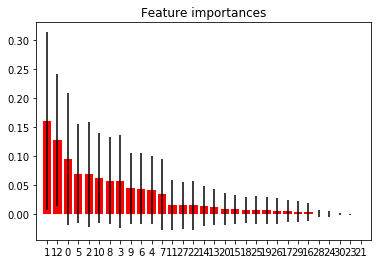

In [19]:
run_feature_importance(nba, 'WIN')

In [38]:
forest = RandomForestClassifier(n_estimators=1000, random_state=0)
X = nba.drop('WIN', axis=1)
y = nba['WIN']

forest.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [39]:
forest.predict_proba(X)

array([[ 0.711,  0.289],
       [ 0.016,  0.984],
       [ 0.072,  0.928],
       [ 0.076,  0.924],
       [ 0.051,  0.949],
       [ 0.72 ,  0.28 ],
       [ 0.116,  0.884],
       [ 0.03 ,  0.97 ],
       [ 0.036,  0.964],
       [ 0.013,  0.987],
       [ 0.042,  0.958],
       [ 0.133,  0.867],
       [ 0.172,  0.828],
       [ 0.051,  0.949],
       [ 0.024,  0.976],
       [ 0.013,  0.987],
       [ 0.049,  0.951],
       [ 0.16 ,  0.84 ],
       [ 0.725,  0.275],
       [ 0.085,  0.915],
       [ 0.064,  0.936],
       [ 0.101,  0.899],
       [ 0.065,  0.935],
       [ 0.767,  0.233],
       [ 0.024,  0.976],
       [ 0.007,  0.993],
       [ 0.144,  0.856],
       [ 0.049,  0.951],
       [ 0.068,  0.932],
       [ 0.092,  0.908],
       [ 0.045,  0.955],
       [ 0.709,  0.291],
       [ 0.019,  0.981],
       [ 0.048,  0.952],
       [ 0.026,  0.974],
       [ 0.76 ,  0.24 ],
       [ 0.028,  0.972],
       [ 0.074,  0.926],
       [ 0.03 ,  0.97 ],
       [ 0.024,  0.976],


In [20]:
nba['WIN'].value_counts()

1    64
0    14
Name: WIN, dtype: int64

## Balancing the data

In [21]:
from sklearn.utils import resample

In [22]:
nba_big = nba[nba['WIN']==1]
nba_small = nba[nba['WIN']==0]

In [23]:
final_data = resample(nba_small, replace=True, n_samples =64, random_state =101)

In [24]:
final_data = pd.concat([final_data, nba_big])

In [25]:
final_data['WIN'].value_counts()

1    64
0    64
Name: WIN, dtype: int64

Feature ranking:
1. feature 3P% (0.180436)
2. feature MP (0.115658)
3. feature FG% (0.113055)
4. feature FT% (0.109370)
5. feature AST (0.068187)
6. feature PTS (0.063178)
7. feature ORB (0.045443)
8. feature TOV (0.039297)
9. feature DRB (0.036706)
10. feature PF (0.036376)
11. feature STL (0.027979)
12. feature HOME (0.027517)
13. feature BLK (0.016976)
14. feature Mon (0.016149)
15. feature Sat (0.015654)
16. feature 10:30p ET (0.015009)
17. feature Wed (0.013186)
18. feature 8:00p ET (0.008627)
19. feature WT (0.008445)
20. feature 8:30p ET (0.007065)
21. feature 7:00p ET (0.005789)
22. feature Thu (0.005660)
23. feature Tue (0.005043)
24. feature 9:00p ET (0.004858)
25. feature Sun (0.004531)
26. feature 2:30p ET (0.004268)
27. feature 7:30p ET (0.003927)
28. feature 6:00p ET (0.000740)
29. feature 9:30p ET (0.000500)
30. feature 12:00p ET (0.000259)
31. feature 3:30p ET (0.000115)


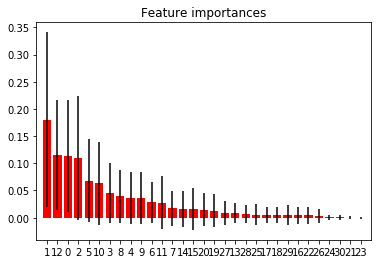

In [26]:
run_feature_importance(final_data, 'WIN')

## Logistic Regression Model

In [27]:
final_data.shape

(128, 32)

In [28]:
final_data.columns

Index(['FG%', '3P%', 'FT%', 'ORB', 'DRB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS', 'HOME', 'WIN', 'MP', 'WT', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue',
       'Wed', '10:30p ET', '12:00p ET', '2:30p ET', '3:30p ET', '6:00p ET',
       '7:00p ET', '7:30p ET', '8:00p ET', '8:30p ET', '9:00p ET', '9:30p ET'],
      dtype='object')

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
from sklearn import metrics

In [32]:
X = final_data.drop(['WIN'], axis=1)
y = final_data['WIN']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [34]:
lr = LogisticRegression()

In [35]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [36]:
predictions = lr.predict(X_test)

In [37]:
print(metrics.classification_report(y_test, predictions))
print(metrics.confusion_matrix(y_test, predictions))

             precision    recall  f1-score   support

          0       0.76      1.00      0.86        19
          1       1.00      0.70      0.82        20

avg / total       0.88      0.85      0.84        39

[[19  0]
 [ 6 14]]


In [38]:
scores = lr.predict_proba(X_test)

In [39]:
scores

array([[ 0.68858242,  0.31141758],
       [ 0.81718181,  0.18281819],
       [ 0.01485259,  0.98514741],
       [ 0.75555164,  0.24444836],
       [ 0.02058986,  0.97941014],
       [ 0.27624573,  0.72375427],
       [ 0.94625866,  0.05374134],
       [ 0.5761132 ,  0.4238868 ],
       [ 0.14626126,  0.85373874],
       [ 0.59739165,  0.40260835],
       [ 0.86919126,  0.13080874],
       [ 0.7601417 ,  0.2398583 ],
       [ 0.52460294,  0.47539706],
       [ 0.94625866,  0.05374134],
       [ 0.68858242,  0.31141758],
       [ 0.24311692,  0.75688308],
       [ 0.29787437,  0.70212563],
       [ 0.14997697,  0.85002303],
       [ 0.94625866,  0.05374134],
       [ 0.52460294,  0.47539706],
       [ 0.68858242,  0.31141758],
       [ 0.83387984,  0.16612016],
       [ 0.68858242,  0.31141758],
       [ 0.75406623,  0.24593377],
       [ 0.68858242,  0.31141758],
       [ 0.8237462 ,  0.1762538 ],
       [ 0.10624496,  0.89375504],
       [ 0.70820663,  0.29179337],
       [ 0.59853401,

In [40]:
metrics.roc_auc_score(y_test,predictions)

0.84999999999999998